# Simple Spark Application

## testing the frequency of randomly generated characters



In [19]:
# check the spark context
sc

In [20]:
# make dataset
import string
import random

data = [random.choice(string.ascii_letters) for i in range(10000)]

In [21]:
# check the first 10 of data
data[:10]


['J', 'i', 'b', 'U', 'b', 'K', 'I', 'P', 'o', 'v']

In [22]:
# parallelize the array


rdd = sc.parallelize(data)

In [23]:
print rdd.take(10)


['J', 'i', 'b', 'U', 'b', 'K', 'I', 'P', 'o', 'v']


In [24]:
# transfrom by normalizing all characters IE make em lowercased and then cache the result
transformed_rdd = rdd.map(lambda c: c.lower())
transformed_rdd.cache()

PythonRDD[17] at RDD at PythonRDD.scala:43

In [25]:
# check to see if it is cached
assert transformed_rdd.is_cached == True, " failed to cache"

In [26]:
# at this point the data is ready for processing
# so let's group the data by giving each character a (c,1) tuple and then folding the
# counts based on the character

counts = transformed_rdd.map(lambda c: (c,1)).reduceByKey(lambda a,b: a+b)


In [27]:
# the result should have length 26
assert counts.count() == 26, "Failed to fold the values"

In [28]:
counts.take(10)

[('a', 376),
 ('c', 393),
 ('b', 407),
 ('e', 349),
 ('d', 407),
 ('g', 392),
 ('f', 375),
 ('i', 398),
 ('h', 392),
 ('k', 376)]

In [29]:
# at this point we want the proportion of each letter relative to all the other letters in the dataset
all_count = rdd.count()

counts = counts.map(lambda (c,n): (c, float(n)/all_count))

#should still have 26 entries
assert counts.count() == 26, "Counts not correct"

In [30]:
# what does it look like?
counts.take(10)



[('a', 0.0376),
 ('c', 0.0393),
 ('b', 0.0407),
 ('e', 0.0349),
 ('d', 0.0407),
 ('g', 0.0392),
 ('f', 0.0375),
 ('i', 0.0398),
 ('h', 0.0392),
 ('k', 0.0376)]

In [31]:
# now let's collect the results
results = counts.collect()

In [32]:
results.sort()
print results

[('a', 0.0376), ('b', 0.0407), ('c', 0.0393), ('d', 0.0407), ('e', 0.0349), ('f', 0.0375), ('g', 0.0392), ('h', 0.0392), ('i', 0.0398), ('j', 0.0354), ('k', 0.0376), ('l', 0.0406), ('m', 0.0383), ('n', 0.0392), ('o', 0.0416), ('p', 0.0389), ('q', 0.0371), ('r', 0.0403), ('s', 0.0385), ('t', 0.0387), ('u', 0.0406), ('v', 0.0369), ('w', 0.0366), ('x', 0.0355), ('y', 0.0348), ('z', 0.0405)]


In [33]:
# let's analyze the results
print sum(map(lambda (c,p): p, results))


1.0


In [34]:
# let's plot a histogram of the data
import matplotlib.pyplot as plt

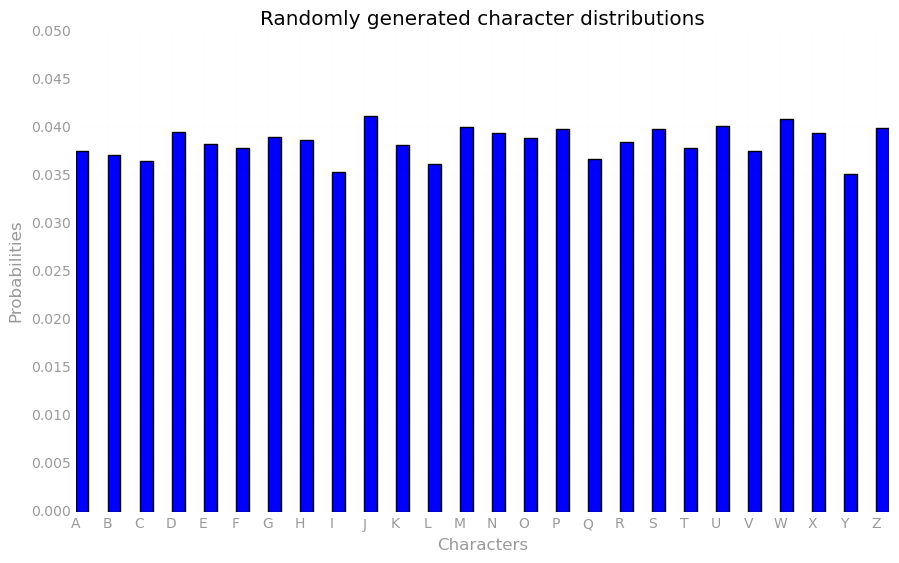

In [18]:
# prepare plot functionb
def preparePlot(xticks, yticks, figsize=(10.5, 6), hideLabels=False, gridColor='#999999', gridWidth=1.0):
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

# this is for each leter
x_loc = range(len(results))

fig, ax= preparePlot(range(0,26), [.001*i for i in range(10)], gridWidth=.01)
barsize = fig.get_figwidth()/len(results)


ax.bar(x_loc, map(lambda (c,p):p, results), barsize, color='b')
ax.set_xticklabels(list(string.uppercase))
ax.set_yticks([.005*i for i in range(0,11)])
ax.set_ylabel("Probabilities")
ax.set_xlabel("Characters")
ax.set_title("Randomly generated character distributions")

# and done!